<a href="https://colab.research.google.com/github/anfisbena/EstadisticaPracticaParaCienciaDeDatos/blob/main/libro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis exploratorio de datos


## Elementos de datos estructurados

## Numericos
<table>
  <tr>
    <th>Tipo Dato</th>
    <th>Descripcion</th>
    <th>Sinonimos</th>
  </tr>
  <tr>
    <td>Continuos</td>
    <td>numeros que pueden tomar cualquier valor en el intervalo</td>
    <td>intervalo, flotante, numerico</td>
  </tr>
  <tr>
    <td>Discretos</td>
    <td>Numeros que solo pueden adoptar valores enteros y definidos</td>
    <td>entero, contable</td>
  </tr>
</table>

## Categoricos
<table>
  <tr>
    <th>Tipo Dato</th>
    <th>Descripcion</th>
    <th>Sinonimos</th>
  </tr>
  <tr>
    <td>Ordinales</td>
    <td>Datos con un orden explicito </td>
    <td>factor ordenado</td>
  </tr>
    <tr>
    <td>Binarios</td>
    <td>si/no, True/false, 1/0</td>
    <td>dicotomico, logico, indicador, booleano</td>
  </tr>
</table>

Los datos categoricos pueden ser tratados por ej:
+ R= ordered.factor
+ Py= (usando libreria psykit.learn) sklearn.preprocessing.OrginalEncoder

# Datos rectangulares

Se identifican asi los datos en dos dimensiones como las tablas, estos tienen los siguientes terminos clave

<table>
  <tr>
    <td>Termino</td>
    <td>Descripcion</td>
    <td>sinonimo</td
  </tr>
  <tr>
    <td>Marco de datos</td>
    <td>Tabla</td>
  </tr>
  <tr>
    <td>Caracteristica</td>
    <td>Columna de la tabla</td>
    <td>atributo, entrada, predictor, variable</td>
  </tr>
  <tr>
    <td>registro</td>
    <td>fila de la tabla</td>
    <td>caso, instancia, ejemplo, observacion, patrón, muestra</td>
  </tr>
  <tr>
    <td>Resultado</td>
    <td>valor de salida del modelo</td>
    <td>variable dependiente, respuesta, objetivo, salida</td>
  </tr>
</table>

In [ ]:
#Ejemplo de una tabla, importada con pandas
import pandas as pd
df=pd.read_csv('tasa_homicidio_estado.csv')
df

,Estado,Poblacion,Tasa de homicidios,Abreviatura
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,california,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


## Estimacion de localizacion
Es importante explorar los valores tipicos de los datos, para eso se utilizan las medidas de tendencia central

<h2>Medidas de tendencia central</h2>
<table>
<tr>
  <th>Medida</th>
  <th>Descripcion</th>
  <th>formula</th>
  <th>Sinonimos</th>
</tr>
<tr>
  <td>Media</td>
  <td>Suma de todos los valores dividido por el numero de valores</td>
  <td>$$ \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} $$</td>
  <td>promedio</td>
</tr>
<tr>
  <td>media ponderada</td>
  <td>Suma de todos los valores * por cada ponderacion y dividida por la suma de las ponderaciones</td>
  <td>$$ \bar{x} = \frac{\sum_{i=1}^{n} w_i \cdot x_i}{\sum_{i=1}^{n} w_i} $$</td>
  <td>promedio ponderado</td>
</tr>
<tr>
  <td>media truncada</td>
  <td>es la media menos n% de valores en los extremos</td>
  <td>$$ \bar{x}_{\text{tr}} = \frac{\sum_{i=p+1}^{n-p} x_i}{n - 2p}
 $$</td>
 <td>media recortada</td>
</tr>
<tr>
  <td>mediana</td>
  <td>es el valor intermedio o promedio de valores intermedios (si es par) del conjunto ordenado de datos</td>
  <td></td>
  <td>percentil 50</td>
</tr>
<tr>
  <td>mediana ponderada</td>
  <td>es la mitad de la suma de las ponderaciones de los datos ordenados</td>
  <td></td>
</tr>
<tr>
  <td>Percentil</td>
  <td>valor P por ciento de datos que se encuentran por debajo del mismo</td>
  <td></td>
  <td>cuantil</td>
</tr>
<tr>
  <td>Robusto</td>
  <td>algo insensible a valores extremos</td>
  <td></td>
  <td>resistente</td>
</tr>
<tr>
  <td>Atipico</td>
  <td>Valor de un dato muy distinto a la mayoria de los valores</td>
  <td></td>
  <td>valor extremo</td>
</tr>
<tr>
  <td></td>
  <td></td>
  <td></td>
</tr>
</table>

In [ ]:
#calculo de medidas de tendencia
from scipy.stats import trim_mean

media=df['Poblacion'].mean()
media_truncada=trim_mean(df['Poblacion'],0.1)
mediana=df['Poblacion'].median()
print(f"media={media}")
print(f"media truncada eliminando el 10% de valores en extremos={media_truncada}")
print(f"mediana={mediana}")

media=7694135.625
media truncada eliminando el 10% de valores en extremos=7694135.625
mediana=4176916.5


## Estimacion de variabilidad
Son las medidas de dispersion y muestran que tanto varian los datos unos con los otros

<h2>Medidas de Dispersion</h2>
<table>
<tr>
  <th>Medida</th>
  <th>Descripcion</th>
  <th>formula</th>
  <th>Sinonimos</th>
</tr>
<tr>
  <td>Desviacion</td>
  <td>diferencia entre los valores observados y proyectados</td>
  <td></td>
  <td>error residual</td>
</tr>
<tr>
  <td>Desviacion estandar</td>
  <td>es la raiz cuadrada de la varianza</td>
  <td>$$ \sigma = \sqrt{Varianza}
 $$</td>
 <td></td>
</tr>
<tr>
  <td>Desviacion media absoluta</td>
  <td>Media absoluta de las desviaciones de la media </td>
  <td>$$ \text{DMA} = \frac{\sum_{i=1}^{n} |x_i - \bar{x}|}{n}
 $$</td>
 <td></td>
</tr>
<tr>
  <td>varianza</td>
  <td>Suma de cuadrados, de las desviaciones con respecto a la media al cuadrado, dividida por n-1</td>
  <td>$$ \sigma^2 = \frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n-1}
 $$</td>
  <td>error cuadratico medio</td>
</tr>
<tr>
  <td>Rango</td>
  <td>diferencia del valor mas alto- el mas bajo</td>
  <td>$$\text{Rango} = \text{Valor Máx} - \text{Valor Mín}$$
</td>
  <td></td>
</tr>
<tr>
  <td>Rango intercuartil</td>
  <td>Diferencia entre el percentil 75 y el 25</td>
  <td></td>
  <td>IQR</td>
</tr>
</table>

Se supone que al medir la variabilidad, las sumas de las desviaciones de la media dan 0, por eso se usa el valor absoluto


<h2>Grados de libertad n o n-1</h2>
Basicamente para los analistas de datos no es representativa esta pregunta pero se utiliza para hacer una estimacion sesgada (n) o no (n-1)

In [ ]:
#calculo de medidas de dispersion
from statsmodels.robust.scale import mad

desvEst=df['Poblacion'].std()
IQR=df['Poblacion'].quantile(0.75)-df['Poblacion'].quantile(0.25)
madcalq=mad(df['Poblacion'])
print(f"desviacion estandar={desvEst}")
print(f"IQR={IQR}")
print(f"MAD(Desviacion absoluta mediana de la mediana)={madcalq}")
print(f"cuartiles={df['Tasa de homicidios'].quantile([0.05,0.25,0.5,0.75,0.95])}")

desviacion estandar=12105745.29585633
IQR=2958479.25
MAD(Desviacion absoluta mediana de la mediana)=2576836.044572552
cuartiles=0.05    2.540
0.25    4.000
0.50    5.150
0.75    5.625
0.95    5.765
Name: Tasa de homicidios, dtype: float64


## Exploracion de la distribucion de datos
Explorar graficamene como se distribuyen los datos de la muestra

<table>
  <tr>
    <th>Grafica</th>
    <th>Descripcion</th>
    <th>sinonimos</th>
  </tr>
  <tr>
    <td>Diagrama de caja</td>
    <td>Diagrama que muestra la distribucion de los datos en cuartiles</td>
    <td>diagrama de bigotes</td>
  </tr>
  <tr>
    <td>Tabla de frecuencias</td>
    <td>Recuento de valores de datos numerios que caen en conjunto de intervalos(contenedores)</td>
    <td>diagrama de bigotes</td>
  </tr>
  <tr>
    <td>Histograma</td>
    <td>Diagrama de frecuencias con intervalos en eje X y recuento en eje Y</td>
    <td>diagrama de bigotes</td>
  </tr>
  <tr>
    <td>Diagrama de densidad</td>
    <td>Version suavizada del histograma que muestra la estimacion de la densidad</td>
  </tr>
</table>

<h2>Diagramas de caja</h2>
Se basan en una distribucion de la informacion por percentiles y datos atipicos en sus colas, por lo general muestran los quartiles

Text(0, 0.5, 'Poblacion(millones)')

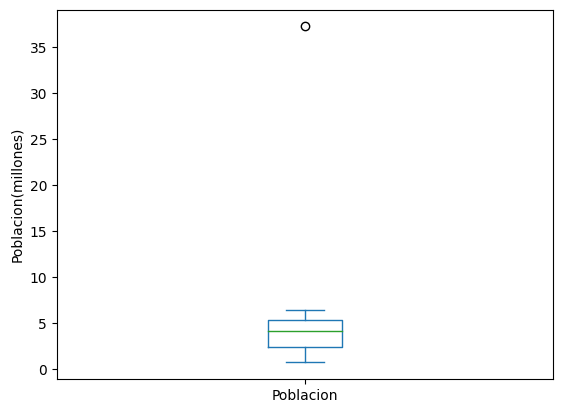

In [ ]:
#diagrama de caja
ax=(df['Poblacion']/1000000).plot.box()
ax.set_ylabel('Poblacion(millones)')

<h2>Histograma o Tabla de frecuencias</h2>
Como su nombre lo dice los histogramas o tablas de frecuencias, dividen la informacion en rangos igualmente espaciados y nos dicen cuantos valores caen en cada segmento

In [ ]:
#segmentacion de valores
binnedPopulation=pd.cut(df['Poblacion'],10)
binnedPopulation.value_counts()

(673687.275, 4364603.5]     4
(4364603.5, 8018976.0]      3
(33599583.5, 37253956.0]    1
(8018976.0, 11673348.5]     0
(11673348.5, 15327721.0]    0
(15327721.0, 18982093.5]    0
(18982093.5, 22636466.0]    0
(22636466.0, 26290838.5]    0
(26290838.5, 29945211.0]    0
(29945211.0, 33599583.5]    0
Name: Poblacion, dtype: int64

<h2>Graficacion histograma</h2>

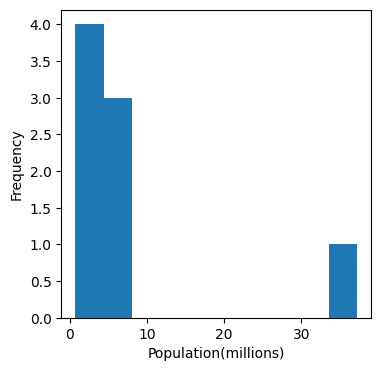

In [ ]:
import matplotlib.pyplot as plt

ax = (df['Poblacion'] / 1000000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population(millions)')
plt.show()

<h2>Graficacion Tabla de frecuencia</h2>

Text(0.5, 0, 'Tasa de homicidios (por 100.000)')

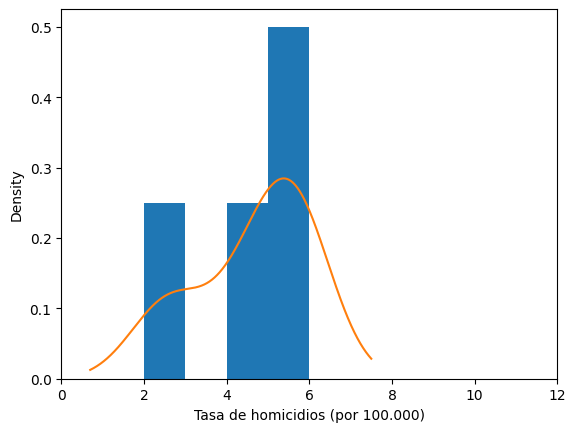

In [ ]:
ax=df['Tasa de homicidios'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
df['Tasa de homicidios'].plot.density(ax=ax)
ax.set_xlabel('Tasa de homicidios (por 100.000)')

## Exploracion de datos Discretos (Binarios y categoricos)

<table>
  <tr>
    <th>Dato</th>
    <th>Descripccion</th>
  </tr>
  <tr>
    <td>Moda</td>
    <td>Dato que ocurre con mas frecuencia</td>
  </tr>
  <tr>
    <td>Valor Esperado</td>
    <td>ponderacion de la probabilidad de ocurrencia de los valores</td>
  </tr>
  <tr>
    <td>Graficos barras</td>
    <td>Frecuencia o proporcion de cada categoria</td>
  </tr>
    <tr>
    <td>Graficos torta</td>
    <td>Frecuencia o proporcion de cada categoria</td>
  </tr>
</table>

## Correlacion
Relacion entre variables, tener una correlacion implica que halla un sesgo

<h3>Terminos Clave</h3>

<table>
  <tr>
    <th>Termino</th>
    <th>Descripcion</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Coeficiente de correlacion</td>
    <td>Mide la asociacion entre variables desde -1/0/1</td>
    <td>\rho = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
</td>
  </tr>
  <tr>
    <td>Matriz de correlacion</td>
    <td>Matriz que muestra la correlacion entre filas y columnas</td>
  </tr>
  <tr>
    <td>Diagrama de dispersion</td>
    <td>duagrana que muestra la dispersion de los datos y por ende la correlacion de estos en formato grafico</td>
  </tr>
</table>